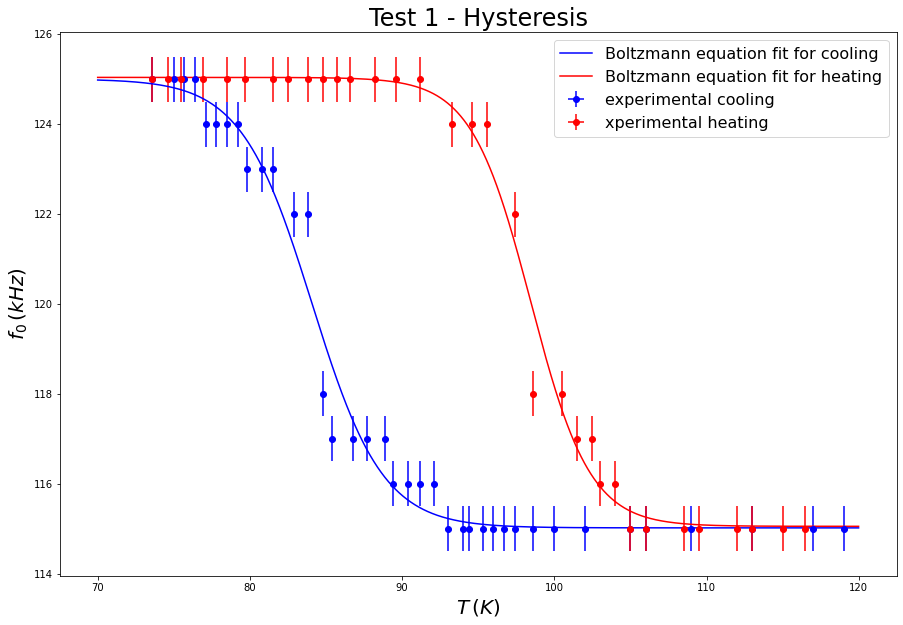

array([115.01661778, 125.00841022,  84.08039806,   2.32047675])

array([115.05130995, 125.04407305,  98.4534176 ,   1.95102878])

In [55]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import display, Markdown, Latex
from scipy.optimize import curve_fit
%matplotlib inline

T1S_Exp = pd.read_csv('Test_1_Salita_Exp.txt')
T1D_Exp = pd.read_csv('Test_1_Discesa_Exp.txt')
T2S_Exp = pd.read_csv('Test_2_Salita_Exp.txt')
T2D_Exp = pd.read_csv('Test_2_Discesa_Exp.txt')

f1, f2, f3, f4 = T1S_Exp['F_Res'], T1D_Exp['F_Res'], T2S_Exp['F_Res'], T2D_Exp['F_Res']
T1, T2, T3, T4 = T1S_Exp['T_Pot'], T1D_Exp['T_Pot'], T2S_Exp['T_Pot'], T2D_Exp['T_Pot']
errf1, errf2, errf3, errf4 = T1S_Exp['Err_F_Res'], T1D_Exp['Err_F_Res'], T2S_Exp['Err_F_Res'], T2D_Exp['Err_F_Res']
errT1, errT2, errT3, errT4 = T1S_Exp['Err_T_Pot'], T1D_Exp['Err_T_Pot'], T2S_Exp['Err_T_Pot'], T2D_Exp['Err_T_Pot']

def Boltzmann(T, f_0, f_1, T_0, tau):
    return f_0+(f_1-f_0)/(1+np.exp((T-T_0)/tau))

x_fit1 = np.arange(70, 120, 0.01)
x_fit2 = np.arange(70, 120, 0.01)

fig = plt.figure(figsize = (15, 10))
plt.errorbar(T1[36:], f1[36:], yerr=errf1[36:], xerr=errT1[36:], errorevery = 1, c = 'b', fmt = 'o', label = 'experimental cooling')
plt.errorbar(T2, f2, yerr=errf2, xerr=errT2, errorevery = 1, c = 'r', fmt = 'o', label = 'xperimental heating')

p_1, cov_1 = curve_fit(Boltzmann, T1, f1, [115, 125, 83.8, 2.5])
p_2, cov_2 = curve_fit(Boltzmann, T2, f2, [115, 125, 98.6, 2.2])

plt.plot(x_fit1,Boltzmann(x_fit1, *p_1), '-', color = 'b', label = 'Boltzmann equation fit for cooling')
plt.plot(x_fit2,Boltzmann(x_fit2, *p_2), '-', color = 'r', label = 'Boltzmann equation fit for heating')

plt.title('Test 1 - Hysteresis', fontsize = 24)
plt.xlabel('$T\,(K)$', fontsize = 20)
plt.ylabel('$f_0\,(kHz)$', fontsize = 20)
plt.legend(fontsize = 16)
plt.show()

display(p_1, p_2)

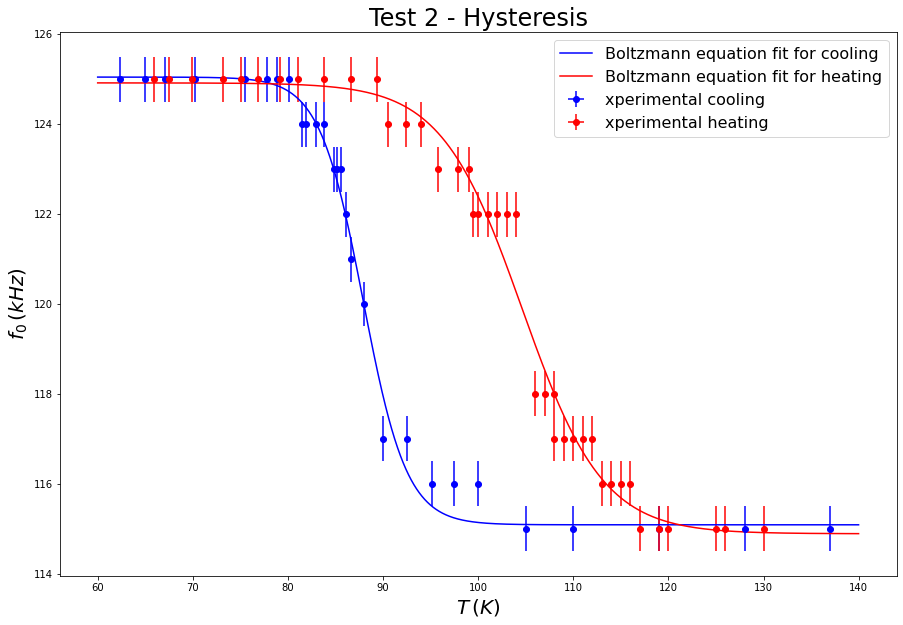

array([115.08526184, 125.05086272,  87.91868515,   2.29729352])

array([114.88582406, 124.92188771, 104.60872241,   4.24536162])

In [57]:
fig1 = plt.figure(figsize = (15, 10))
plt.errorbar(T3[20:], f3[20:], yerr=errf3[20:], xerr=errT3[20:], errorevery = 1, c = 'b', fmt = 'o', label = 'xperimental cooling')
plt.errorbar(T4, f4, yerr=errf4, xerr=errT4, errorevery = 1, c = 'r', fmt = 'o', label = 'xperimental heating')

x_fit3 = np.arange(60, 140, 0.01)
x_fit4 = np.arange(60, 140, 0.01)

p_3, cov_3 = curve_fit(Boltzmann, T3, f3, [115, 125, 88, 2.5])
p_4, cov_4 = curve_fit(Boltzmann, T4, f4, [115, 125, 106, 4])

plt.plot(x_fit3, Boltzmann(x_fit3, *p_3), '-', color = 'b', label = 'Boltzmann equation fit for cooling')
plt.plot(x_fit4, Boltzmann(x_fit4, *p_4), '-', color = 'r', label = 'Boltzmann equation fit for heating')

plt.title('Test 2 - Hysteresis', fontsize = 24)
plt.xlabel('$T\,(K)$', fontsize = 20)
plt.ylabel('$f_0\,(kHz)$', fontsize = 20)
plt.legend(fontsize = 16)
plt.show()

display(p_3, p_4)